In [1]:
import os
import numpy as np
import nibabel as nib #Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt

In [2]:
brain_dir = './IXI_brain/'
brain_files = [f for f in os.listdir(brain_dir)]
print("Number of brains: ", len(brain_files))

Number of brains:  581


In [3]:
one_brain = np.array(nib.load( os.path.join(brain_dir, brain_files[42]) ).get_data())
shape = one_brain.shape
print(one_brain.dtype, one_brain.itemsize)
print(one_brain.size)
print("Brain image shape: ", shape) 

float32 4
7221032
Brain image shape:  (182, 218, 182)


In [4]:
dataset_size = len(brain_files)*one_brain.size*one_brain.itemsize
print("Size =", np.round(dataset_size/1024**3, 2), "GB")

Size = 15.63 GB


In [5]:
average_brain = np.zeros_like(one_brain)
for brain in brain_files:
    average_brain = average_brain + np.array(nib.load(os.path.join(brain_dir, brain)).get_data())
average_brain = average_brain/len(brain_files)

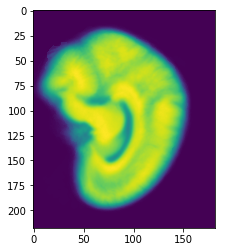

In [6]:
dimension = 0
s = 100
plt.imshow(np.take(average_brain, s, dimension))
plt.show()

['IXI277-HH-1770-T1.nii.gz', 'IXI043-Guys-0714-T1.nii.gz', 'IXI115-Guys-0738-T1.nii.gz', 'IXI225-Guys-0832-T1.nii.gz', 'IXI206-HH-1650-T1.nii.gz', 'IXI589-Guys-1080-T1.nii.gz', 'IXI481-HH-2175-T1.nii.gz', 'IXI278-HH-1771-T1.nii.gz', 'IXI267-HH-1772-T1.nii.gz', 'IXI074-Guys-0771-T1.nii.gz', 'IXI296-HH-1970-T1.nii.gz', 'IXI201-HH-1588-T1.nii.gz', 'IXI395-IOP-0969-T1.nii.gz', 'IXI410-Guys-0958-T1.nii.gz', 'IXI567-HH-2536-T1.nii.gz', 'IXI594-Guys-1089-T1.nii.gz', 'IXI354-HH-2024-T1.nii.gz', 'IXI502-Guys-1020-T1.nii.gz', 'IXI573-IOP-1155-T1.nii.gz', 'IXI213-HH-1642-T1.nii.gz']


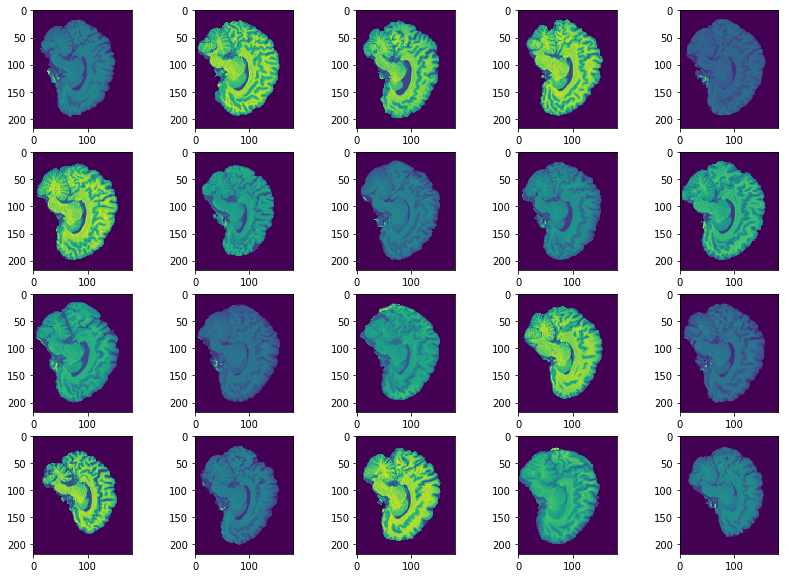

In [7]:
# Load a few brains
num_few = 20
print(brain_files[:num_few])
np_brains = np.array([nib.load( os.path.join(brain_dir, brain) ).get_data() for brain in brain_files[:num_few]])

dimension = 0
s = 100
plt.figure(figsize=(14, 10))
for i in range(1, 5*4+1):
    plt.subplot(4,5,i)
    plt.imshow(np.take(np_brains[i-1], s, dimension))
plt.show()